In [1]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

目标函数 $y=w_1x^2+w_2x+b$

In [2]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w1 = torch.tensor([1.0])
w2 = torch.tensor([1.0])
b = torch.tensor([1.0])

w1.requires_grad = True
w2.requires_grad = True
b.requires_grad = True

In [3]:
def forward(x):
  return w1 * x ** 2 + w2 * x + b

def loss(x, y):
  y_pred = forward(x)
  return (y_pred - y) ** 2

loss_list = []
epoch_list = []

In [4]:
print('Predict (before training)', 4, forward(4))
for epoch in range(100):
  for x, y in zip(x_data, y_data):
    loss_val = loss(x, y)
    loss_val.backward()

    w1.data -= 0.01 * w1.grad.data
    w2.data -= 0.01 * w2.grad.data
    b.data -= 0.01 * b.grad.data

    w1.grad.data.zero_() #释放之前计算的梯度
    w2.grad.data.zero_()
    b.grad.data.zero_()

  epoch_list.append(epoch)
  loss_list.append(loss_val.item())
  if epoch % 10 == 0:
    print('epoch:', epoch, 'loss=', loss_val.item())

print('Predict (after training)', 4, forward(4).item())

Predict (before training) 4 tensor([21.], grad_fn=<AddBackward0>)
epoch: 0 loss= 18.321826934814453
epoch: 10 loss= 0.02848036028444767
epoch: 20 loss= 0.019148115068674088
epoch: 30 loss= 0.014172340743243694
epoch: 40 loss= 0.011208509095013142
epoch: 50 loss= 0.00937769003212452
epoch: 60 loss= 0.00820931326597929
epoch: 70 loss= 0.007440924644470215
epoch: 80 loss= 0.006920332089066505
epoch: 90 loss= 0.0065572685562074184
Predict (after training) 4 8.544171333312988


预测结果和目标函数有差距的原因是，我们给定的 x 和 y 的关系并不能满足目标函数，所以得到的结果会有偏差

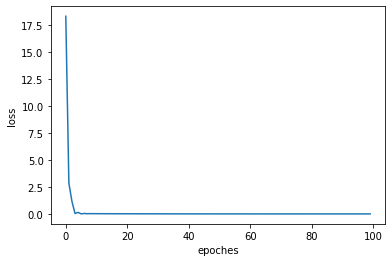

In [5]:
plt.plot(epoch_list, loss_list)
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()